(13, 6, 574) (22, 1, 574) (13, 1, 574) (29, 6, 574)
(6, 7462) (1, 12628) (1, 7462)


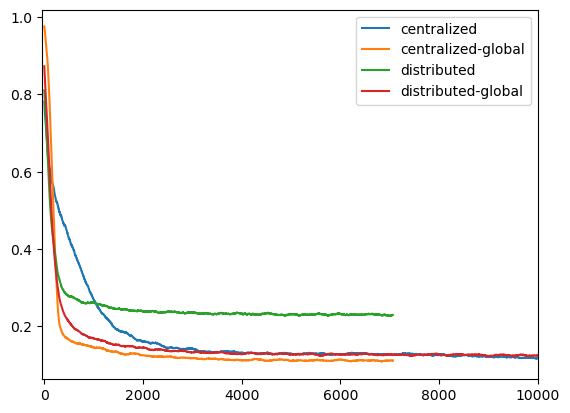

(30, 6, 574) (12, 1, 574) (17, 1, 574) (16, 6, 574)
(6, 17220) (1, 6888) (1, 9758)


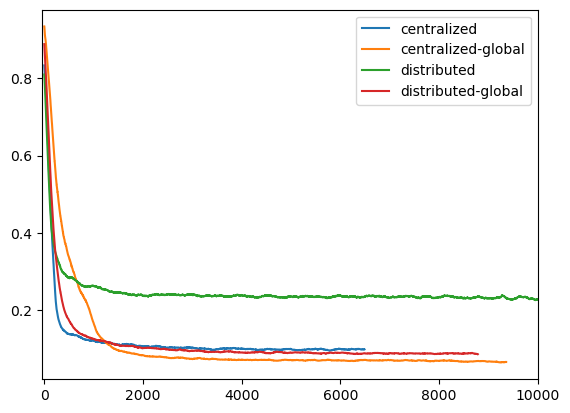

In [5]:
import numpy as np
import os, pickle
from einops import rearrange
import matplotlib.pyplot as plt

def get_train(path):
    with open(os.path.join(path, 'train.pkl'), 'rb') as f:
        return np.array(pickle.load(f))
    
def plot(name, ds):
    d1 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl0_lr0_dist')
    d2 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl0_lr0_central')
    d3 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr0_central')
    d4 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr0_dist')

    print(d1.shape, d2.shape, d3.shape, d4.shape)
    d1 = rearrange(d1, 'b l c -> l (b c)')
    d2 = rearrange(d2, 'b l c -> l (b c)')
    d3 = rearrange(d3, 'b l c -> l (b c)')
    d4 = rearrange(d4, 'b l c -> l (b c)')
    print(d1.shape, d2.shape, d3.shape)
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'valid')[:-window_size]
    ds1 = [movingaverage(d1[i], 200) for i in range(len(d1))]
    ds2 = movingaverage(d2[0], 200)
    ds3 = movingaverage(d3[0], 200)
    ds4 = [movingaverage(d4[i], 200) for i in range(len(d4))]
    # for i in range(len(ds1)):
    #     plt.plot(ds1[i], alpha=0.1)
    plt.plot(ds2, label='centralized')
    plt.plot(ds3, label='centralized-global')
    plt.plot(np.average(ds1, axis=0), label='distributed')
    plt.plot(np.average(ds4, axis=0), label='distributed-global')
    plt.legend()
    plt.xlim(-50, 10000)
    # plt.yscale('log')
    plt.show()

plot('weather', 'weather')
plot('weather2', 'weather')


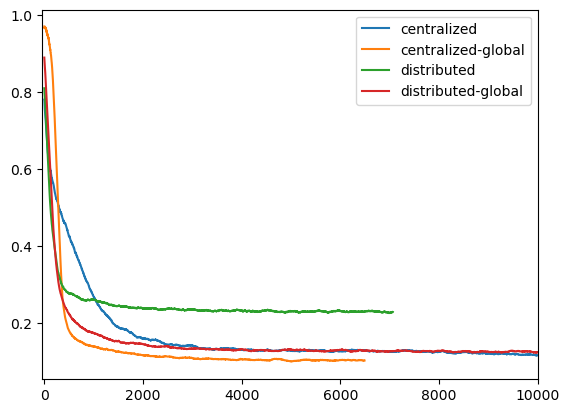

(13, 6) (22, 1)


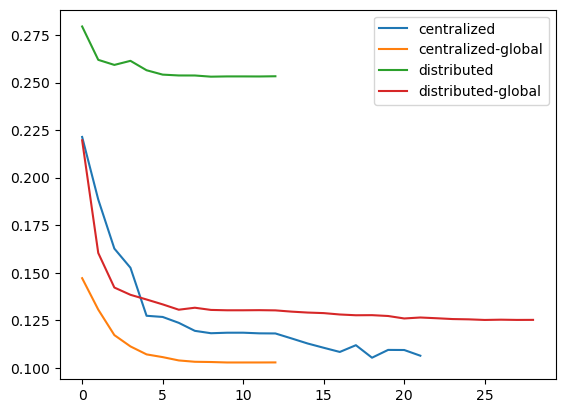

In [24]:
def get_val(path):
    with open(os.path.join(path, 'vali.pkl'), 'rb') as f:
        return np.array(pickle.load(f))
    
d1 = get_val('runs/weather_TCN_weather_sl128_ll10_pl48_el3_gl0_lr0_dist')
d2 = get_val('runs/weather_TCN_weather_sl128_ll10_pl48_el3_gl0_lr0_central')
d3 = get_val('runs/weather_TCN_weather_sl128_ll10_pl48_el3_gl1_lr0_central')
d4 = get_val('runs/weather_TCN_weather_sl128_ll10_pl48_el3_gl1_lr0_dist')

print(d1.shape, d2.shape)
plt.plot(d2, label='centralized')
plt.plot(d3, label='centralized-global')
plt.plot(np.average(d1, axis=1), label='distributed')
plt.plot(np.average(d4, axis=1), label='distributed-global')
plt.legend()
# plt.yscale('log')
plt.show()